## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.
D:\Anaconda3\envs\envirment_1\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda3\envs\envirment_1\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda3\envs\envirment_1\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda3\envs\envirment_1\lib\site-packages\tensorflow\python

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
from keras.models import Sequential
from keras.layers import Dense
def build_mlp(input_shape, output_units):
    """Code Here
    建立你的神經網路
    """
    model = Sequential()
    model.add(Dense(input_shape = input_shape, units = 512 , activation = 'relu'))
    model.add(Dense(units = 256 , activation = 'relu'))
    model.add(Dense(units = 128 , activation = 'relu'))
    model.add(Dense(units = output_units , activation = 'softmax'))
    return model

In [14]:
"""Code Here
設定超參數
"""
learning_rate = 0.001
epochs = 50
batch_size = 32
momentum = [0.95,0.9,0.8,0.7,0.6]
nesterov = [True, False]

In [16]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for momentum_i in momentum:
    for nesterov_j in nesterov:
        keras.backend.clear_session()
        print('experienment ==>'+'(momentum:'+str(momentum_i)+')'+'(nesterov:'+str(nesterov_j)+')')
        model = build_mlp(input_shape = x_train.shape[1:], output_units = 10)
        model.summary()
        opt = keras.optimizers.SGD(learning_rate = learning_rate,momentum = momentum_i,nesterov=nesterov_j)
        model.compile(loss = 'categorical_crossentropy' , optimizer = opt, metrics = ['accuracy'])
        model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, validation_data = (x_test, y_test), shuffle = True)
        train_loss = model.history.history['loss']
        train_accuracy = model.history.history['accuracy']
        valid_loss = model.history.history['val_loss']
        valid_accuracy = model.history.history['val_accuracy']
        results['experement__momentum:'+str(momentum_i)+'__nesterov:'+str(nesterov_j)] = {'train_loss': train_loss, 'train_accuracy':train_accuracy,'valid_loss': valid_loss, 'valid_accuracy': valid_accuracy}

experienment ==>(momentum:0.95)(nesterov:True)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 40s 793us/step - loss: 1.8084 - accuracy: 0.3503 - val_loss: 1.6632 - val_accuracy: 0.4

50000/50000 [==============================] - 41s 819us/step - loss: 0.4617 - accuracy: 0.8349 - val_loss: 1.9680 - val_accuracy: 0.5295
Epoch 50/50
50000/50000 [==============================] - 40s 803us/step - loss: 0.4459 - accuracy: 0.8404 - val_loss: 1.9712 - val_accuracy: 0.5225
experienment ==>(momentum:0.95)(nesterov:False)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,

50000/50000 [==============================] - 27s 536us/step - loss: 0.5081 - accuracy: 0.8177 - val_loss: 1.7682 - val_accuracy: 0.5327
Epoch 48/50
50000/50000 [==============================] - 28s 555us/step - loss: 0.4975 - accuracy: 0.8212 - val_loss: 1.8870 - val_accuracy: 0.5289
Epoch 49/50
50000/50000 [==============================] - 28s 555us/step - loss: 0.4806 - accuracy: 0.8284 - val_loss: 1.8650 - val_accuracy: 0.5284
Epoch 50/50
50000/50000 [==============================] - 28s 554us/step - loss: 0.4864 - accuracy: 0.8260 - val_loss: 1.8828 - val_accuracy: 0.5333
experienment ==>(momentum:0.9)(nesterov:True)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
______________

50000/50000 [==============================] - 41s 817us/step - loss: 0.6001 - accuracy: 0.7853 - val_loss: 1.5811 - val_accuracy: 0.5395
Epoch 46/50
50000/50000 [==============================] - 41s 824us/step - loss: 0.5839 - accuracy: 0.7931 - val_loss: 1.7081 - val_accuracy: 0.5335
Epoch 47/50
50000/50000 [==============================] - 42s 840us/step - loss: 0.5666 - accuracy: 0.7993 - val_loss: 1.6453 - val_accuracy: 0.5477
Epoch 48/50
50000/50000 [==============================] - 42s 839us/step - loss: 0.5518 - accuracy: 0.8035 - val_loss: 1.6890 - val_accuracy: 0.5377
Epoch 49/50
50000/50000 [==============================] - 41s 816us/step - loss: 0.5366 - accuracy: 0.8094 - val_loss: 1.6497 - val_accuracy: 0.5444
Epoch 50/50
50000/50000 [==============================] - 41s 823us/step - loss: 0.5223 - accuracy: 0.8159 - val_loss: 1.7670 - val_accuracy: 0.5232
experienment ==>(momentum:0.9)(nesterov:False)
Model: "sequential_1"
___________________________________________

50000/50000 [==============================] - 29s 579us/step - loss: 0.6527 - accuracy: 0.7688 - val_loss: 1.5942 - val_accuracy: 0.5347
Epoch 44/50
50000/50000 [==============================] - 28s 564us/step - loss: 0.6371 - accuracy: 0.7735 - val_loss: 1.5068 - val_accuracy: 0.5475
Epoch 45/50
50000/50000 [==============================] - 29s 571us/step - loss: 0.6179 - accuracy: 0.7799 - val_loss: 1.5645 - val_accuracy: 0.5379
Epoch 46/50
50000/50000 [==============================] - 30s 591us/step - loss: 0.6040 - accuracy: 0.7840 - val_loss: 1.6326 - val_accuracy: 0.5465
Epoch 47/50
50000/50000 [==============================] - 29s 572us/step - loss: 0.5847 - accuracy: 0.7929 - val_loss: 1.5939 - val_accuracy: 0.5407
Epoch 48/50
50000/50000 [==============================] - 29s 572us/step - loss: 0.5739 - accuracy: 0.7965 - val_loss: 1.6627 - val_accuracy: 0.5374
Epoch 49/50
50000/50000 [==============================] - 29s 589us/step - loss: 0.5534 - accuracy: 0.8047 - va

50000/50000 [==============================] - 41s 821us/step - loss: 0.8572 - accuracy: 0.6999 - val_loss: 1.4192 - val_accuracy: 0.5275
Epoch 41/50
50000/50000 [==============================] - 41s 821us/step - loss: 0.8465 - accuracy: 0.7012 - val_loss: 1.4010 - val_accuracy: 0.5398
Epoch 42/50
50000/50000 [==============================] - 43s 856us/step - loss: 0.8299 - accuracy: 0.7080 - val_loss: 1.4050 - val_accuracy: 0.5349
Epoch 43/50
50000/50000 [==============================] - 42s 841us/step - loss: 0.8161 - accuracy: 0.7127 - val_loss: 1.5072 - val_accuracy: 0.5179
Epoch 44/50
50000/50000 [==============================] - 43s 851us/step - loss: 0.8018 - accuracy: 0.7202 - val_loss: 1.3906 - val_accuracy: 0.5439
Epoch 45/50
50000/50000 [==============================] - 42s 831us/step - loss: 0.7876 - accuracy: 0.7218 - val_loss: 1.4458 - val_accuracy: 0.5278
Epoch 46/50
50000/50000 [==============================] - 42s 847us/step - loss: 0.7748 - accuracy: 0.7271 - va

50000/50000 [==============================] - 28s 559us/step - loss: 0.9056 - accuracy: 0.6806 - val_loss: 1.3658 - val_accuracy: 0.5354
Epoch 39/50
50000/50000 [==============================] - 28s 560us/step - loss: 0.8932 - accuracy: 0.6848 - val_loss: 1.3598 - val_accuracy: 0.5385
Epoch 40/50
50000/50000 [==============================] - 29s 576us/step - loss: 0.8764 - accuracy: 0.6893 - val_loss: 1.3891 - val_accuracy: 0.5342
Epoch 41/50
50000/50000 [==============================] - 29s 575us/step - loss: 0.8620 - accuracy: 0.6958 - val_loss: 1.3510 - val_accuracy: 0.5441
Epoch 42/50
50000/50000 [==============================] - 29s 573us/step - loss: 0.8459 - accuracy: 0.7024 - val_loss: 1.4045 - val_accuracy: 0.5368
Epoch 43/50
50000/50000 [==============================] - 28s 561us/step - loss: 0.8306 - accuracy: 0.7066 - val_loss: 1.3795 - val_accuracy: 0.5405
Epoch 44/50
50000/50000 [==============================] - 29s 572us/step - loss: 0.8171 - accuracy: 0.7130 - va

50000/50000 [==============================] - 42s 831us/step - loss: 1.0178 - accuracy: 0.6433 - val_loss: 1.3570 - val_accuracy: 0.5331
Epoch 37/50
50000/50000 [==============================] - 42s 834us/step - loss: 1.0054 - accuracy: 0.6494 - val_loss: 1.3238 - val_accuracy: 0.5348
Epoch 38/50
50000/50000 [==============================] - 43s 855us/step - loss: 0.9918 - accuracy: 0.6518 - val_loss: 1.3655 - val_accuracy: 0.5215
Epoch 39/50
50000/50000 [==============================] - 42s 837us/step - loss: 0.9808 - accuracy: 0.6550 - val_loss: 1.3509 - val_accuracy: 0.5334
Epoch 40/50
50000/50000 [==============================] - 42s 836us/step - loss: 0.9676 - accuracy: 0.6589 - val_loss: 1.3373 - val_accuracy: 0.5300
Epoch 41/50
50000/50000 [==============================] - 42s 836us/step - loss: 0.9539 - accuracy: 0.6659 - val_loss: 1.3639 - val_accuracy: 0.5270
Epoch 42/50
50000/50000 [==============================] - 42s 837us/step - loss: 0.9431 - accuracy: 0.6689 - va

50000/50000 [==============================] - 29s 584us/step - loss: 1.0426 - accuracy: 0.6324 - val_loss: 1.3339 - val_accuracy: 0.5353
Epoch 35/50
50000/50000 [==============================] - 28s 563us/step - loss: 1.0311 - accuracy: 0.6390 - val_loss: 1.4249 - val_accuracy: 0.5102
Epoch 36/50
50000/50000 [==============================] - 29s 577us/step - loss: 1.0178 - accuracy: 0.6406 - val_loss: 1.3505 - val_accuracy: 0.5308
Epoch 37/50
50000/50000 [==============================] - 28s 558us/step - loss: 1.0056 - accuracy: 0.6458 - val_loss: 1.3622 - val_accuracy: 0.5248
Epoch 38/50
50000/50000 [==============================] - 29s 572us/step - loss: 0.9943 - accuracy: 0.6494 - val_loss: 1.3853 - val_accuracy: 0.5272
Epoch 39/50
50000/50000 [==============================] - 28s 565us/step - loss: 0.9826 - accuracy: 0.6537 - val_loss: 1.3381 - val_accuracy: 0.5358
Epoch 40/50
50000/50000 [==============================] - 28s 565us/step - loss: 0.9678 - accuracy: 0.6583 - va

50000/50000 [==============================] - 42s 845us/step - loss: 1.1380 - accuracy: 0.5989 - val_loss: 1.3369 - val_accuracy: 0.5331
Epoch 33/50
50000/50000 [==============================] - 42s 842us/step - loss: 1.1252 - accuracy: 0.6039 - val_loss: 1.3501 - val_accuracy: 0.5254
Epoch 34/50
50000/50000 [==============================] - 41s 829us/step - loss: 1.1141 - accuracy: 0.6083 - val_loss: 1.3495 - val_accuracy: 0.5207
Epoch 35/50
50000/50000 [==============================] - 41s 827us/step - loss: 1.1012 - accuracy: 0.6114 - val_loss: 1.3307 - val_accuracy: 0.5326
Epoch 36/50
50000/50000 [==============================] - 42s 841us/step - loss: 1.0907 - accuracy: 0.6161 - val_loss: 1.3231 - val_accuracy: 0.5297
Epoch 37/50
50000/50000 [==============================] - 42s 831us/step - loss: 1.0808 - accuracy: 0.6186 - val_loss: 1.3497 - val_accuracy: 0.5212
Epoch 38/50
50000/50000 [==============================] - 42s 839us/step - loss: 1.0689 - accuracy: 0.6231 - va

50000/50000 [==============================] - 29s 589us/step - loss: 1.1627 - accuracy: 0.5914 - val_loss: 1.3238 - val_accuracy: 0.5279
Epoch 31/50
50000/50000 [==============================] - 30s 593us/step - loss: 1.1501 - accuracy: 0.5952 - val_loss: 1.3321 - val_accuracy: 0.5297
Epoch 32/50
50000/50000 [==============================] - 29s 572us/step - loss: 1.1384 - accuracy: 0.5994 - val_loss: 1.3309 - val_accuracy: 0.5243
Epoch 33/50
50000/50000 [==============================] - 30s 592us/step - loss: 1.1274 - accuracy: 0.6010 - val_loss: 1.4116 - val_accuracy: 0.5045
Epoch 34/50
50000/50000 [==============================] - 29s 573us/step - loss: 1.1144 - accuracy: 0.6086 - val_loss: 1.3185 - val_accuracy: 0.5317
Epoch 35/50
50000/50000 [==============================] - 29s 572us/step - loss: 1.1036 - accuracy: 0.6110 - val_loss: 1.3467 - val_accuracy: 0.5240
Epoch 36/50
50000/50000 [==============================] - 29s 574us/step - loss: 1.0889 - accuracy: 0.6177 - va

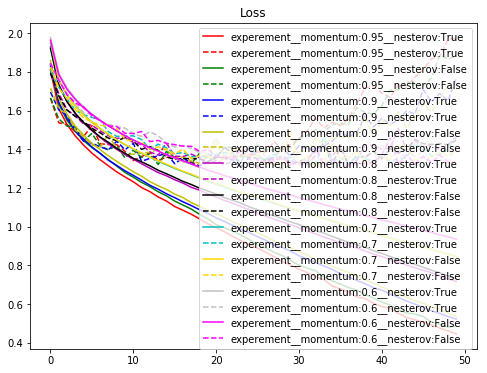

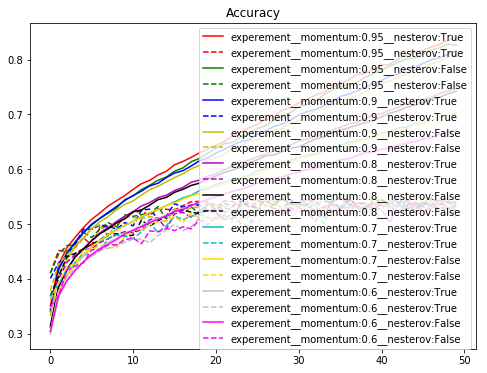

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k", "c" , "gold" ,"silver" , "magenta", "tomato","tan"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_loss'])),results[cond]['train_loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_loss'])),results[cond]['valid_loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_accuracy'])),results[cond]['train_accuracy'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_accuracy'])),results[cond]['valid_accuracy'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()